In [1]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn

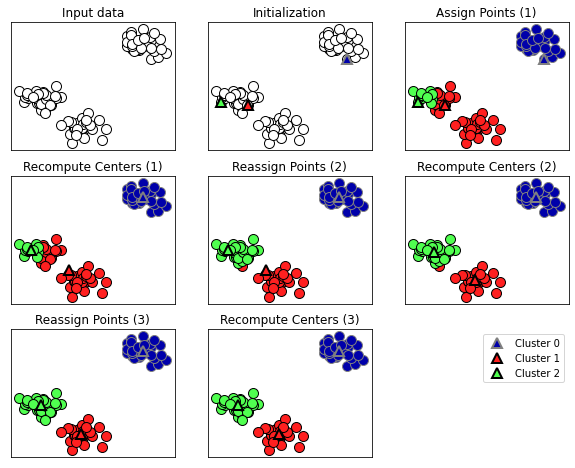

In [2]:
# 특성 데이터만 있고 라벨이 없음 군집분류
mglearn.plots.plot_kmeans_algorithm()

In [8]:
df = pd.read_csv('data/kmean.csv',index_col='Unnamed: 0')
df.head()

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7


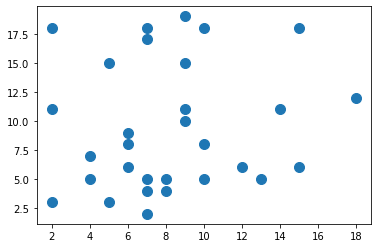

In [13]:
plt.scatter(df['x'],df['y'], s=100)
plt.show()

## 비지도학습 (군집분류)

In [116]:
k = KMeans(n_clusters =4)
km =k.fit(df)

In [117]:
# n_clusters 갯수에 맞는 센터값
cen=km.cluster_centers_
cen

array([[16.5       , 15.        ,  3.        ],
       [ 5.83333333,  5.08333333,  0.        ],
       [ 6.375     , 16.375     ,  0.875     ],
       [11.5       ,  7.75      ,  2.        ]])

In [119]:
cen[:,0]

array([16.5       ,  5.83333333,  6.375     , 11.5       ])

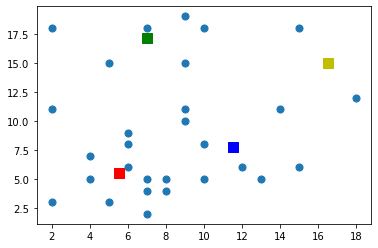

In [63]:
plt.scatter(df['x'],df['y'], s=50)
plt.scatter(cen[:,0],cen[:,1], s=100, marker='s', c=['r','g','b','y'])
plt.show()

In [42]:
# 군집분류 라벨
km.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 3, 3], dtype=int32)

In [44]:
df['label'] = km.labels_
df.head()

,x,y,label
0,2,3,0
1,2,11,0
2,2,18,1
3,4,5,0
4,4,7,0


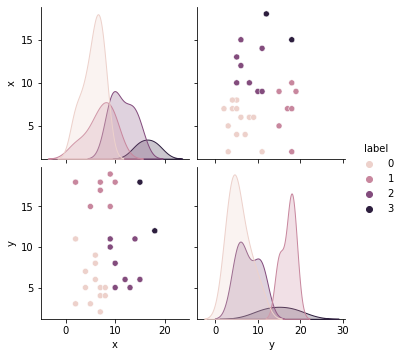

In [45]:
sb.pairplot(df, hue='label')
plt.show()

[]

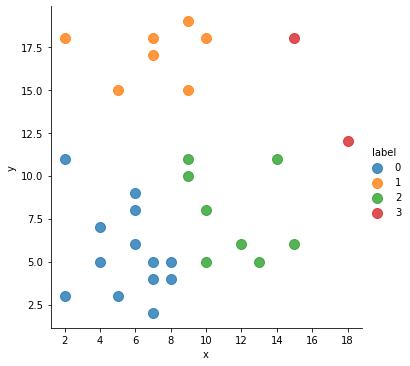

In [53]:
# 회귀선 출력 plot
sb.lmplot(x='x', y='y', data=df,fit_reg=False, 
          hue='label', scatter_kws={'s':100})
plt.plot()

## 연습문제 : 
- iris 데이터를 이용하여 최적의 분류갯수(n_clusters)를 찾고 kmeans로 군집분류를 수행하시오

In [134]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [71]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 데이터 분류
- 군집분류를 하기 위해서 특성데이터만 추출

In [72]:
x_data = iris['data']

In [105]:
### 데이터 프레임으로 만들기
x_df = pd.DataFrame(x_data,columns=iris.feature_names)
x_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [106]:
estimators = [('scaler',StandardScaler()),
              ('kmeans',KMeans())]

pipe = Pipeline(estimators)              

param = {'kmeans__n_clusters':[i for i in range(1,10)]}

gridKmean = GridSearchCV(pipe, param_grid=param, verbose=1)
gridKmean.fit(x_df)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=8, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
           

In [127]:
# 최적의 파라미터 값 찾기
gridKmean.best_params_

{'kmeans__n_clusters': 9}

In [186]:
# 최적으 파라미터로 KMeans.fit하기
k = KMeans(n_clusters=3) # 최적의 파라미터는 9이나 원본 데이터의 라벨값이 3개로 주어져있음
km =k.fit(x_df)

In [187]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [193]:
x_df['label'] = km.labels_
x_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [189]:
# n_clusters 갯수에 맞는 센터값
cen=km.cluster_centers_
cen

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623, 1.06557377],
       [5.006     , 3.428     , 1.462     , 0.246     , 1.12      ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615, 1.        ]])

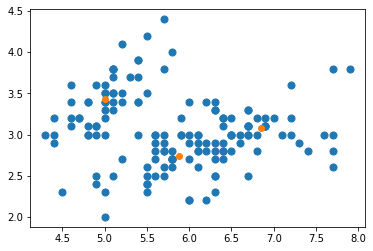

In [190]:
plt.scatter(x_df['sepal length (cm)'],x_df['sepal width (cm)'], s=50)
plt.scatter(cen[:,0],cen[:,1])
plt.show()

[]

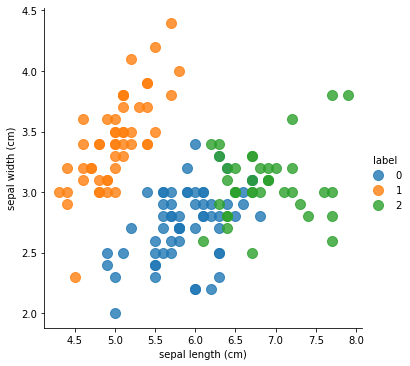

In [191]:
# 회귀선 출력 plot
sb.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=x_df, fit_reg=False, 
          hue='label', scatter_kws={'s':100})
plt.plot()

In [192]:
# 각 센터를 중심으로 떨어진 거리의 총합
km.inertia_

131.87337074401006

In [183]:
data = []
for n in range(1,11):
    model = KMeans(n_clusters=n)
    km    = model.fit(x_df)
    data.append(km.inertia_)

In [184]:
data

[734.7039333333333,
 204.80934059521496,
 131.87337074401006,
 75.18717593881527,
 53.250849837662344,
 42.39998724608725,
 34.83091630591631,
 30.06311061745273,
 27.98096776030987,
 26.08365743570155]

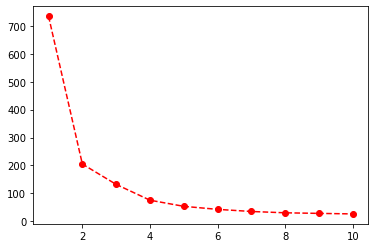

In [185]:
# n_clusters의 갯수가 많아질수록 중심과의 거리가 줄어듬을 확인
# 그래프를 통해 최적의 갯수 구하기

plt.plot(range(1,11),data,'ro--')
plt.show()